## Clustering con Python

## Importar el dataset


In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("/Users/Luis Antonio Garza/Python proyectos/python-ml-course-master/datasets/wine/winequality-red.csv", sep = ";")

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.shape

(1599, 12)

In [7]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

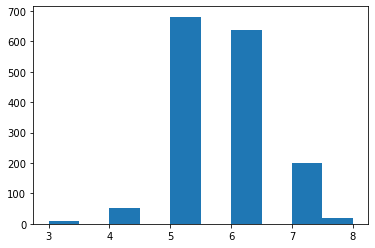

In [8]:
plt.hist(df["quality"])

In [9]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### Normalización de los datos

In [10]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


### Clustering jerárquico con scikit-learn

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
clus = AgglomerativeClustering(n_clusters = 6, linkage = "ward").fit(df_norm)

In [25]:
md_h = pd.Series(clus.labels_)

Text(0, 0.5, 'Número de vinos del cluster')

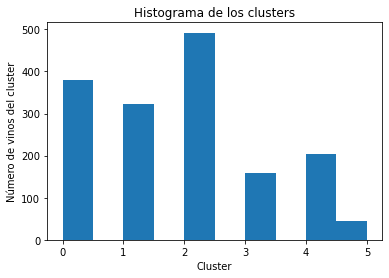

In [31]:
plt.hist(md_h)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

In [16]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [19]:
Z = linkage(df_norm, "ward")

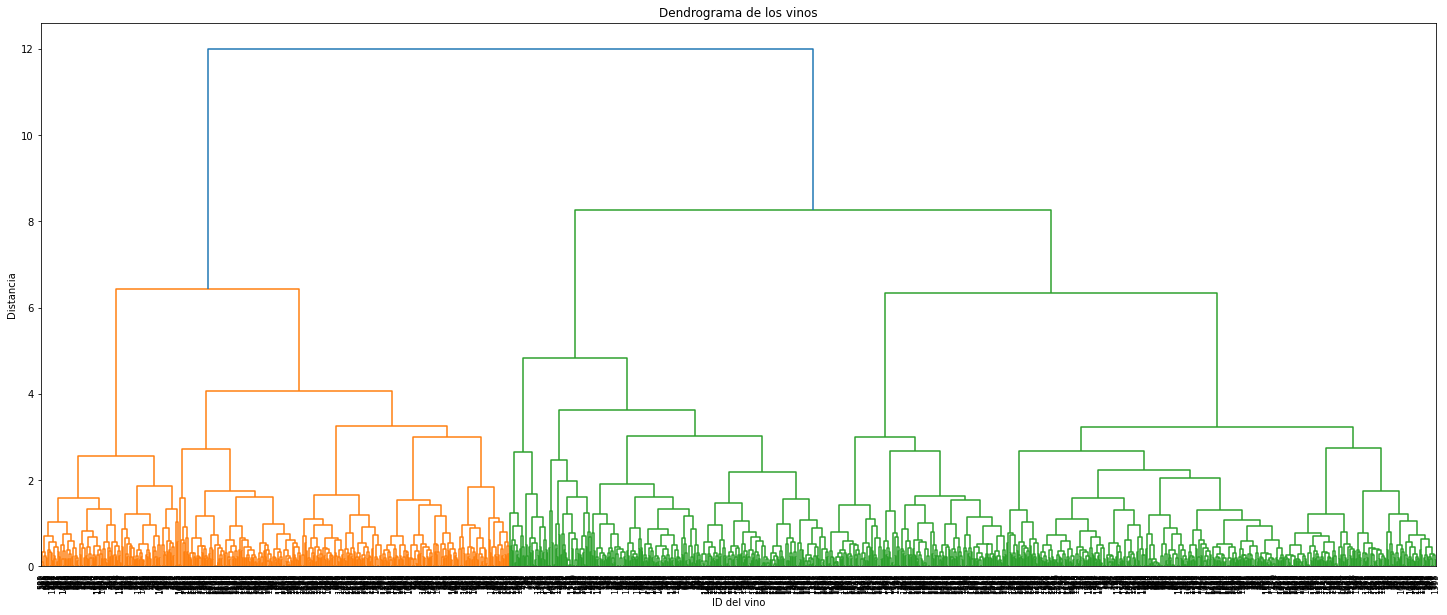

In [20]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation = 90., leaf_font_size = 8.)
plt.show()

## K- means

In [22]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [37]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(n_clusters=6)

In [38]:
model.labels_

array([4, 4, 4, ..., 3, 3, 1])

In [39]:
md_k = pd.Series(model.labels_)

In [40]:
df_norm["clust_h"] = md_h
df_norm["clust_k"] = md_k

In [41]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,5
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,4


(array([ 29.,   0., 355.,   0., 358.,   0., 220.,   0., 471., 166.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

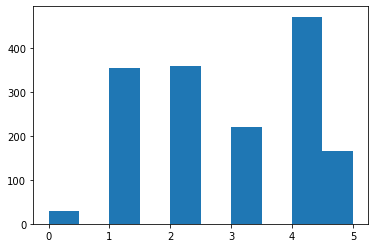

In [42]:
plt.hist(md_k)

In [32]:
model.cluster_centers_

array([[0.26345539, 0.36045717, 0.12035928, 0.09135838, 0.12274949,
        0.14521661, 0.10810887, 0.49209071, 0.48712025, 0.15541372,
        0.21888019, 0.43912176],
       [0.36148029, 0.16073474, 0.41854545, 0.10438356, 0.10601912,
        0.15984635, 0.08353357, 0.41547991, 0.42073014, 0.23560152,
        0.47865734, 0.69090909],
       [0.58242935, 0.20579706, 0.51197581, 0.13400354, 0.13117965,
        0.13908451, 0.09183005, 0.65596431, 0.33194691, 0.22249855,
        0.29185277, 0.54758065],
       [0.17539978, 0.32438116, 0.08798246, 0.09354722, 0.09600064,
        0.24993823, 0.12286901, 0.32474496, 0.57804945, 0.18426305,
        0.48747188, 0.60964912],
       [0.31671366, 0.27789421, 0.30416404, 0.15198133, 0.12695186,
        0.38021504, 0.29781186, 0.5391195 , 0.43592737, 0.17871512,
        0.21415514, 0.45488959],
       [0.33716814, 0.29223744, 0.48133333, 0.07557078, 0.53789649,
        0.20938967, 0.21071849, 0.5143906 , 0.2335958 , 0.59001996,
        0.16512821,

In [33]:
model.inertia_

186.54405088007738

## Interpretación final

In [43]:
df_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.237107,0.346009,0.130690,0.100968,0.135225,0.142788,0.089192,0.464935,0.486288,0.219079,0.263660,0.455172,4.344828
1,0.386713,0.170365,0.429211,0.114220,0.111223,0.153819,0.083283,0.460578,0.414240,0.226887,0.431029,0.647324,0.042254
2,0.304272,0.275503,0.283017,0.149422,0.124481,0.359135,0.274523,0.517338,0.445454,0.178186,0.240660,0.484358,1.016760
3,0.195093,0.330495,0.140091,0.084060,0.157566,0.251985,0.139704,0.349139,0.538905,0.243740,0.448100,0.568182,4.150000
4,0.265374,0.361210,0.117601,0.090873,0.121200,0.147140,0.110141,0.491726,0.486149,0.154328,0.219560,0.442038,1.929936
5,0.634609,0.208822,0.539759,0.127826,0.130931,0.138215,0.094023,0.682165,0.306612,0.224082,0.294223,0.562651,2.945783
